In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

ticker_code = "IBM"

df = yf.download(ticker_code, start='2025-01-01', end='2025-06-13', group_by='ticker')
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(1)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Date,,,,,
2025-01-02,218.895348,219.556512,214.730987,217.040131,2579500
2025-01-03,217.642083,220.711079,217.642083,219.714386,3872100
2025-01-06,220.059782,221.391988,217.839448,219.734131,2846700
2025-01-07,220.405168,223.720867,219.892020,221.007126,3299300
2025-01-08,220.957782,221.934719,217.918390,220.237396,2619800


In [3]:
from statsmodels.tsa.stattools import adfuller , kpss

def adf_test(col):
    print(f"p-val : {adfuller(col)[1]}")

def kpss_test(col):
    print(f"p-val : {kpss(col , regression='c')[1]}")

In [ ]:
#differencing       
diff_col = df['Close'].diff()
diff_col

Date
2025-01-02         NaN
2025-01-03    2.674255
2025-01-06    0.019745
2025-01-07    1.272995
2025-01-08   -0.769730
                ...   
2025-06-06    2.010010
2025-06-09    3.209991
2025-06-10    4.160004
2025-06-11    5.279999
2025-06-12   -0.489990
Name: Close, Length: 111, dtype: float64

In [6]:
adf_test(diff_col.dropna())

p-val : 1.0648434016976619e-19


In [7]:
#transformation
import numpy as np
log_col = np.log(df['Close'])
sqrl_col = np.sqrt(df['Close'])

In [8]:
adf_test(log_col)

p-val : 0.466821637037478


In [9]:
adf_test(sqrl_col)

p-val : 0.49865553249379585


In [10]:
#box-cox transformation
from scipy import stats
stat , lam = stats.boxcox(df["Close"])

In [14]:
adf_test(stat)

p-val : 0.65066925335149


(array([20089., 20120., 20148., 20179., 20209., 20240.]),
 [Text(20089.0, 0, '2025-01'),
  Text(20120.0, 0, '2025-02'),
  Text(20148.0, 0, '2025-03'),
  Text(20179.0, 0, '2025-04'),
  Text(20209.0, 0, '2025-05'),
  Text(20240.0, 0, '2025-06')])

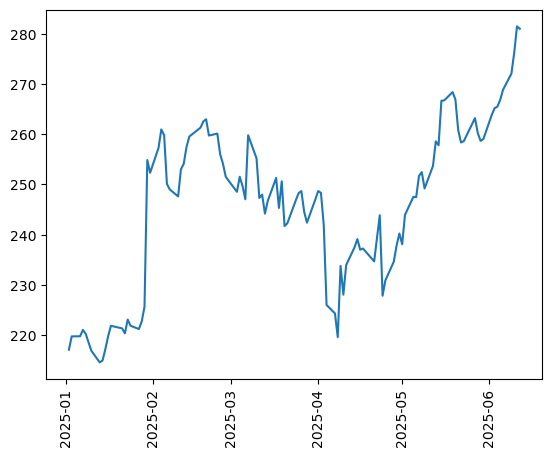

In [16]:
plt.plot(df.index , df["Close"])
plt.xticks(rotation = 90)

In [17]:
len(df)

111

In [20]:
# moving average detrending
ma = df['Close'].rolling(window = 3  , center = True).mean()
detrend = df['Close'] - ma 
col = detrend.dropna()
adf_test(col)

p-val : 5.3363388743739805e-08
